The fifth De Jong's objective function
$$
f(x, y) = \left(2.10^{-3} + \sum_{i=-2}^2 \sum_{j=-2}^2 \left(5(i+2) + j + 3 + (x -16j)^6+ (y -16i)^6\right)^{-1}\right)^{-1}
$$
 is defined over the square $[-65.536, 65.536]^2$

In [1]:
using Globtim
include("../src/lib_func.jl") # Include the library of functions

# Constants and Parameters
d = 8 # Initial Degree 
const n, a, b = 2, 65.536, 1 
const scale_factor = a / b       # Scaling factor appears in `main_computation`, maybe it should be a parameter.
const delta, alpha = .9 , 8 / 10  # Sampling parameters
const tol_l2 = 5e-1             # Define the tolerance for the L2-norm

f = dejong5; # Function to be optimized

In [2]:
while true # Potential infinite loop
    global poly_approx = MainGenerate(f, 2, d, delta, alpha, scale_factor, 0.2) # computes the approximant in Chebyshev basis
    if poly_approx.nrm < tol_l2
        println("attained the desired L2-norm: ", poly_approx.nrm)
        break
    else
        println("current L2-norm: ", poly_approx.nrm)
        println("Number of samples: ", poly_approx.N)
        global d += 1
    end
end;

current L2-norm: 3.0641441816947634
Number of samples: 17
current L2-norm: 3.432932361463995
Number of samples: 21
current L2-norm: 3.67799066250337
Number of samples: 24
current L2-norm: 2.49198275142109
Number of samples: 28
current L2-norm: 1.8590745541583156
Number of samples: 31
current L2-norm: 1.4697753549987613
Number of samples: 35
current L2-norm: 1.3563630518895262
Number of samples: 39
current L2-norm: 1.3727944635147538
Number of samples: 44
current L2-norm: 1.0023615898672948
Number of samples: 48
current L2-norm: 1.1183656058014175
Number of samples: 53
current L2-norm: 1.0438393381836764
Number of samples: 58
current L2-norm: 0.9501401843428493
Number of samples: 63
current L2-norm: 0.8193548207219333
Number of samples: 68
current L2-norm: 0.7051262938171516
Number of samples: 74
current L2-norm: 0.6770935666116656
Number of samples: 80
current L2-norm: 0.6206632864182754
Number of samples: 85
current L2-norm: 0.5337043136279467
Number of samples: 91
current L2-norm: 0.

In [3]:
using DynamicPolynomials, HomotopyContinuation, ProgressLogging, DataFrames
@polyvar(x[1:n]) # Define polynomial ring 
ap = main_nd(n, d, poly_approx.coeffs, x)
# Expand the polynomial approximant to the standard monomial basis in the Lexicographic order w.r.t x. 
PolynomialApproximant = sum(Float64.(ap) .* MonomialVector(x, 0:d))
grad = differentiate.(PolynomialApproximant, x)
sys = System(grad)
println("The system is of degree:", d-1)

Check
The system is of degree:25


In [4]:
Real_sol_lstsq = HomotopyContinuation.solve(sys)
real_pts = HomotopyContinuation.real_solutions(Real_sol_lstsq; only_real=true, multiple_results=false);

Computing mixed cells... 2    Time: 0:00:00
Computing mixed cells... 22    Time: 0:00:00
  mixed_volume:  625


Tracking 625 paths...   0%|▏                            |  ETA: 4:21:35



Tracking 625 paths...   7%|██▏                          |  ETA: 0:10:53



Tracking 625 paths...  10%|██▉                          |  ETA: 0:07:54



Tracking 625 paths...  13%|███▋                         |  ETA: 0:06:02



Tracking 625 paths...  16%|████▌                        |  ETA: 0:04:43



Tracking 625 paths...  19%|█████▍                       |  ETA: 0:03:52



Tracking 625 paths...  22%|██████▎                      |  ETA: 0:03:11



Tracking 625 paths...  25%|███████▏                     |  ETA: 0:02:43



Tracking 625 paths...  27%|███████▉                     |  ETA: 0:02:23



Tracking 625 paths...  29%|████████▌                    |  ETA: 0:02:09



Tracking 625 paths...  32%|█████████▍                   |  ETA: 0:01:53



Tracking 625 paths...  36%|██████████▎                  |  ETA: 0:01:38



Tracking 625 paths...  39%|███████████▏                 |  ETA: 0:01:26



Tracking 625 paths...  41

In [5]:
condition(point) = -1 < point[1] < 1 && -1 < point[2] < 1
filtered_points = filter(condition, real_pts) # Filter points using the filter function
# Colllect the critical points of the approximant 
h_x = Float64[point[1] for point in filtered_points] # Initialize the x vector for critical points of approximant
h_y = Float64[point[2] for point in filtered_points] # Initialize the y vector
h_z = map(p -> f([p[1], p[2]]), zip(scale_factor * h_x, scale_factor * h_y))
df = DataFrame(x=scale_factor * h_x, y=scale_factor * h_y, z=h_z) # Create a DataFrame

Row,x,y,z
,Float64,Float64,Float64
1,61.1368,65.0613,500.0
2,-32.0766,46.2848,499.96
3,53.4767,-63.7407,500.0
4,64.7179,29.4352,499.999
5,-61.3216,-61.3169,500.0
6,65.0616,-61.1398,500.0
7,-48.2763,65.121,500.0
8,63.6094,63.6122,500.0
9,-65.1238,48.2975,500.0


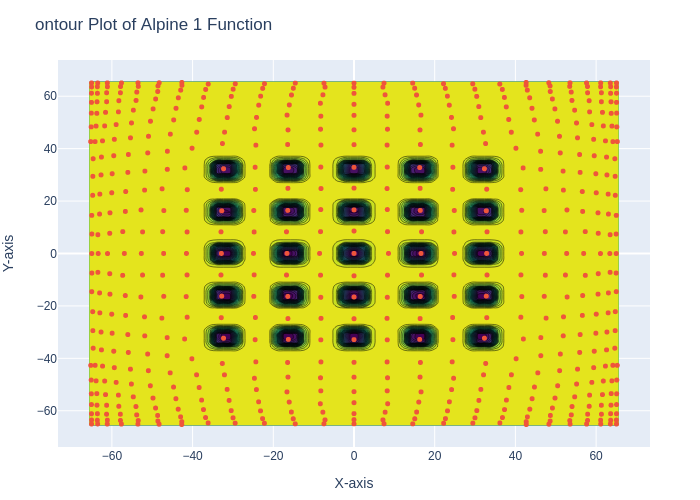

In [6]:
using PlotlyJS, Colors
# Generate the grid and evaluate the function
N = 80  # resolution of the grid
x = range(-scale_factor, scale_factor, length=N)
y = range(-scale_factor, scale_factor, length=N)
z = [f([xi, yi]) for yi in y, xi in x]

#Scatter plot the critical points of the approximant
scatter_traces = [scatter(x=df.x, y=df.y, mode="markers", marker_size=5, name="Critical Points")]

# Create the contour plot
cp = contour(x=x, y=y, z=z, ncontours=40, colorscale="Viridis", showscale=false)

# Combine contour plot and scatter traces
all_traces = [cp; scatter_traces...]

# Customize layout to handle legend groups
layout = Layout(
    title="ontour Plot of Alpine 1 Function",
    xaxis_title="X-axis",
    yaxis_title="Y-axis",
    legend=(tracegroupgap=10, groupclick="toggleitem"),
    height=800 # Increase the height to make room for the legend 
)

# Display the combined plot with legend
display(plot(all_traces, layout))



In [7]:
# Optimize the collected entries 
using Optim
for i in 1:nrow(df)
    println("Optimizing for point $i")
    x0 = [df.x[i], df.y[i]]
    res = Optim.optimize(f, x0, LBFGS(), Optim.Options(show_trace=true))
    minimizer = Optim.minimizer(res)
    min_value = Optim.minimum(res)
    steps = res.iterations
    converged = Optim.converged(res)
    distance = norm(x0 - minimizer)

    # df.local_minima[i] = min_value
    # df.distance_to_minima[i] = distance
    # df.steps[i] = steps
    # df.converged[i] = converged

    println(summary(res))
end


Optimizing for point 1
Iter     Function value   Gradient norm 
     0     4.999998e+02     2.066947e-05
 * time: 0.05144309997558594
     1     4.919912e+02     8.120614e+00
 * time: 1.6334071159362793
     2     2.506780e+02     2.509065e+02
 * time: 1.6336030960083008
     3     2.017545e+02     2.573999e+02
 * time: 1.6336669921875
     4     2.102498e+01     4.609617e+00
 * time: 1.6337499618530273
     5     2.018908e+01     3.553215e-01
 * time: 1.633803129196167
     6     2.015486e+01     1.408423e-02
 * time: 1.6338670253753662
     7     2.015355e+01     1.805972e-03
 * time: 1.6339640617370605
     8     2.015351e+01     6.570254e-04
 * time: 1.634080171585083
     9     2.015350e+01     3.337352e-04
 * time: 1.6341900825500488
    10     2.015350e+01     2.292748e-04
 * time: 1.6343181133270264
    11     2.015349e+01     1.151140e-05
 * time: 1.6345040798187256
    12     2.015349e+01     5.468790e-06
 * time: 1.634721040725708
    13     2.015349e+01     4.518396e-06
 * 

Excessive output truncated after 524338 bytes.

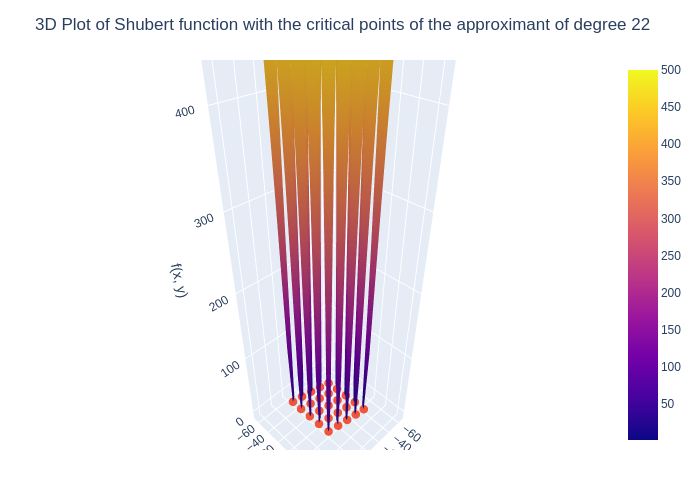

In [8]:
sf = surface(x=x, y=y, z=z)
# Had to switch the coordinates of the critical points to match the surface plot for some reason. 
crit_pts = scatter3d(x=df.y, y=df.x, z=df.z, mode="markers", marker_size=5, name="Critical Points")

# Layout for the plot
layout = Layout(title="3D Plot of Shubert function with the critical points of the approximant of degree 22",
    scene=attr(
        xaxis_title="x",
        yaxis_title="y",
        zaxis_title="f(x, y)"),
    height=800
)
# Display the plot layout,
plt = plot([sf, crit_pts], layout)

In [10]:
savefig(plt, "../data/figures/dejong5_function_plot.html")

"../data/figures/dejong5_function_plot.html"